# Dérivées Partielles : Étude de l'erreur Quadratique Moyenne

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Dérivées d'un plan (exemple du cours)

In [3]:
# Paramètres du modèle linéaire
w1, w2, b = 0.5, 0.5, 2

# Générer une grille de points
x1_vals = np.linspace(-5, 5, 10)
x2_vals = np.linspace(-5, 5, 10)
x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = w1 * x1 + w2 * x2 + b

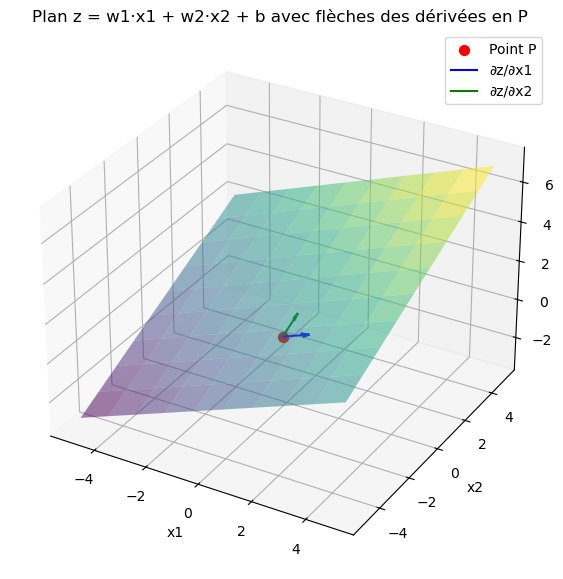

In [4]:
# Point P où on trace les dérivées
x1_p, x2_p = 1, -2
z_p = w1 * x1_p + w2 * x2_p + b

# Longueur des flèches pour visualisation
arrow_length = 1.0

# Coordonnées des flèches (dérivées partielles)
dx1 = arrow_length
dz1 = w1 * dx1

dx2 = 0
dy2 = arrow_length
dz2 = w2 * dy2

# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface du plan
ax.plot_surface(x1, x2, z, alpha=0.5, cmap='viridis')

# Tracer le point P
ax.scatter(x1_p, x2_p, z_p, color='red', s=50, label='Point P')

# Flèche dérivée par rapport à x1
ax.quiver(x1_p, x2_p, z_p, 1, 0, w1, color='blue', label='∂z/∂x1')

# Flèche dérivée par rapport à x2
ax.quiver(x1_p, x2_p, z_p, 0, 1, w2, color='green', label='∂z/∂x2')

# Réglages du graphique
ax.set_title("Plan z = w1·x1 + w2·x2 + b avec flèches des dérivées en P")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z")
ax.legend()
plt.show()

## 2. Dérivées partielles de la `MSE`

Pour rappel, la fonction `MSE` est donnée par la formule :


$L(w, b) = \displaystyle \frac{1}{m} \sum_{i=1}^m \left( y^{(i)} - (w x^{(i)} + b) \right)^2$


Les dérivées partielles sont : 


- $\displaystyle \frac{\partial L}{\partial w} = -\frac{2}{m} \sum_{i=1}^{m} x^{(i)} \left( y^{(i)} - (w x^{(i)} + b) \right)$
- $\displaystyle \frac{\partial L}{\partial b} = -\frac{2}{m} \sum_{i=1}^{m} \left( y^{(i)} - (w x^{(i)} + b) \right)$





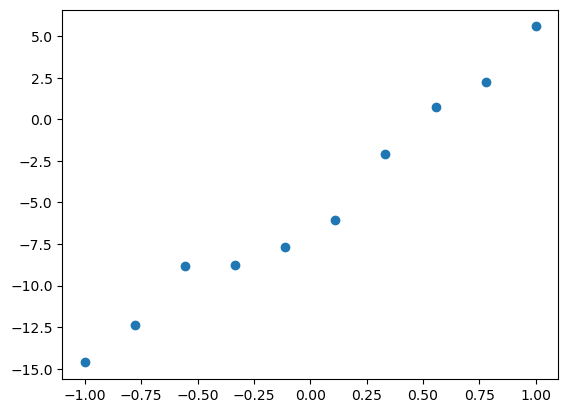

In [5]:
m = 10
X = np.linspace(-1, 1, m)
y = 10 * X - 5 + np.random.randn(m)

plt.scatter(X, y)

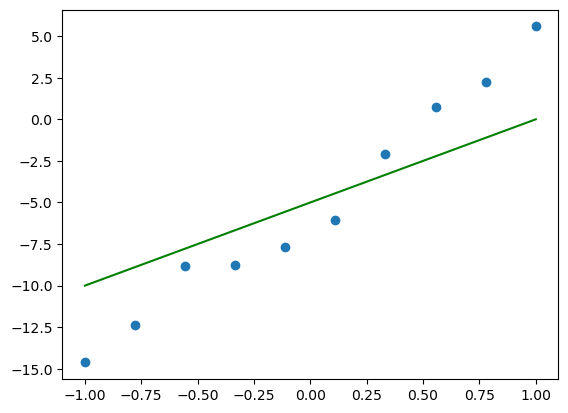

In [6]:
w = 5
b = -5

y_pred = w * X + b

plt.scatter(X, y)
plt.plot(X, y_pred, c='g')

### Tracé de la surface MSE

In [7]:
# Fonction MSE
def mse(w, b):
    predictions = w * X + b
    errors = y - predictions
    return np.mean(errors**2)

In [8]:
# Grille de valeurs pour w et b
w_vals = np.linspace(-10, 30, 30)
b_vals = np.linspace(-15, 10, 30)
W, B = np.meshgrid(w_vals, b_vals)

In [9]:
# Calcul de la surface MSE
Z = np.array([[mse(w, b) for w in w_vals] for b in b_vals])

/var/folders/7c/qh_f77q909x2hjyg13cbq0600000gn/T/ipykernel_8084/3801047108.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


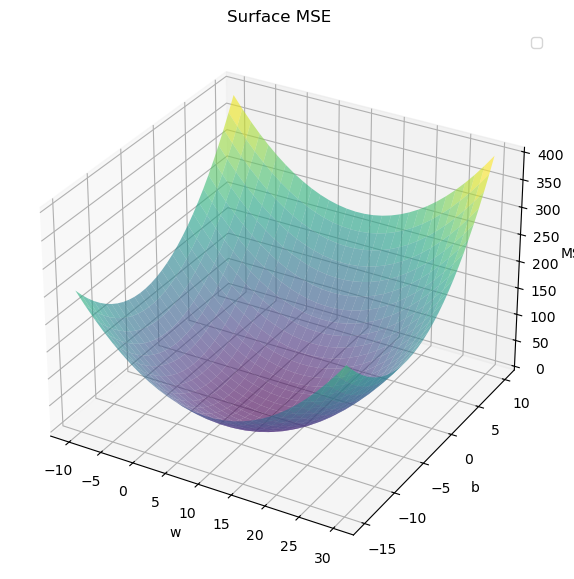

In [10]:
# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface MSE
ax.plot_surface(W, B, Z, alpha=0.6, cmap='viridis')

# Réglages
ax.set_title("Surface MSE")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("MSE")
ax.legend()
plt.show()

### Ajout d'un point P

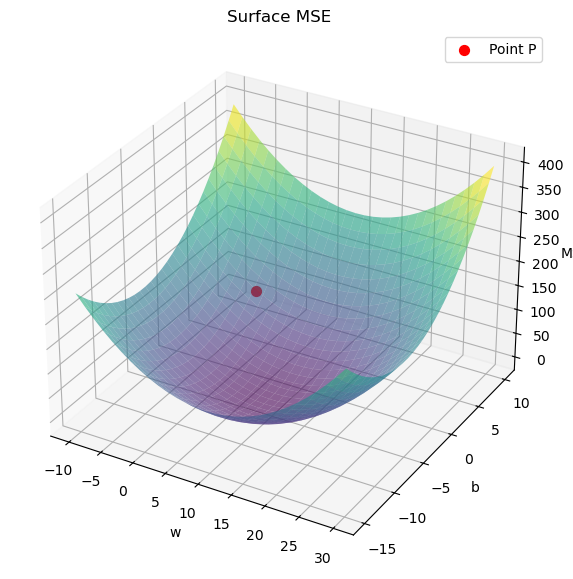

In [11]:
# Point P où tracer les gradients
w_p, b_p = 0, 3

# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface MSE
ax.plot_surface(W, B, Z, alpha=0.6, cmap='viridis')

# Point P
z_p = mse(w_p, b_p)
ax.scatter(w_p, b_p, z_p, color='red', s=50, label='Point P')

ax.set_title("Surface MSE")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("MSE")
ax.legend()
plt.show()

In [12]:
# Point P où tracer les gradients
w_p, b_p = 0, 0

# Calcul des dérivées partielles
dL_dw = -2/m * np.sum(X * (y - (w_p * X + b_p)))
dL_db = -2/m * np.sum(y - (w_p * X + b_p))

print("dL / dw = ", dL_dw)
print("dL / db = ", dL_db)

dL / dw =  -7.86352760803301
dL / db =  10.359154834730871


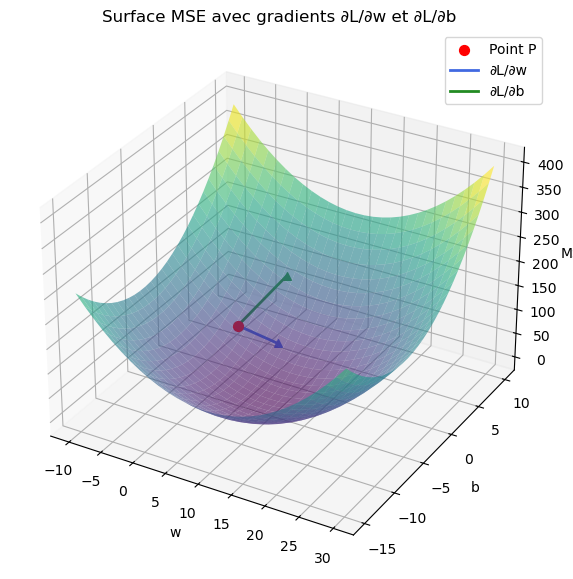

In [46]:
# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface MSE
ax.plot_surface(W, B, Z, alpha=0.6, cmap="viridis", linewidth=0)

# Point P
z_p = mse(w_p, b_p)
ax.scatter(w_p, b_p, z_p, color='red', s=50, label='Point P')

# Flèches des dérivées
# gradients normalisés puis redimensionnés de façon homogène
g_w = np.array([-dL_dw, 0,  2*dL_dw])
g_b = np.array([ 0,      dL_db, 2*dL_db])
L = 0.8 # longueur apparente (en unités de l’axe z)
for g, col in [(g_w, 'royalblue'), (g_b, 'forestgreen')]:
    x2, y2, z2 = w_p+g[0]*L, b_p+g[1]*L, z_p+g[2]*L
    ax.plot([w_p, x2], [b_p, y2], [z_p, z2], color=col, lw=2, label='∂L/∂' + ('w' if col == 'royalblue' else 'b'))
    ax.scatter(x2, y2, z2, color=col, s=30, marker='^')   # tête = petit triangle

# Réglages
ax.set_title("Surface MSE avec gradients ∂L/∂w et ∂L/∂b")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("MSE")
ax.legend()
plt.show()